In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/ppf-2.csv',parse_dates=True)
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
df

Date  High
0  1968-01-01   4.8
1  1969-01-01   4.8
2  1970-01-01   5.0
3  1971-01-01   5.0
4  1972-01-01   5.0
5  1973-01-01   5.3
6  1974-04-01   5.8
7  1974-08-01   7.0
8  1975-04-01   7.0
9  1976-01-01   7.0
10 1977-01-01   7.5
11 1978-01-01   7.5
12 1979-01-01   7.5
13 1980-01-01   8.0
14 1981-01-01   8.5
15 1982-01-01   8.5
16 1983-01-01   9.0
17 1984-01-01   9.5
18 1985-01-01  10.0
19 1986-01-01  12.0
20 1987-01-01  12.0
21 1988-01-01  12.0
22 1989-01-01  12.0
23 1990-01-01  12.0
24 1991-01-01  12.0
25 1992-01-01  12.0
26 1993-01-01  12.0
27 1994-01-01  12.0
28 1995-01-01  12.0
29 1996-01-01  12.0
30 1997-01-01  12.0
31 1998-01-01  12.0
32 1999-04-01  12.0
33 2000-01-15  11.0
34 2001-03-01   9.5
35 2002-03-01   9.0
36 2003-03-01   8.0
37 2004-01-01   8.0
38 2005-01-01   8.0
39 2006-01-01   8.0
40 2007-01-01   8.0
41 2008-01-01   8.0
42 2009-01-01   8.0
43 2010-01-01   8.0
44 2011-12-01   8.6
45 2012-04-01   8.8
46 2013-04-01   8.7
47 2014-01-01   8.7
48 2015-01-01   8.7
49 2016-04-01   8.7
50 2016-10-01   8.0
51 2017-04-01   7.9
52 2017-07-01   7.8
53 2018-01-01   7.6
54 2018-10-01   8.0
55 2019-07-01   7.9
56 2020-04-01   7.1
57 2021-04-01   7.1
58 2022-04-01   7.1
59 2023-04-01   7.1

In [4]:
df = df[(df['Date'] <= '2020-04-01')]

In [5]:
df.tail()

Date  High
52 2017-07-01   7.8
53 2018-01-01   7.6
54 2018-10-01   8.0
55 2019-07-01   7.9
56 2020-04-01   7.1

In [6]:
df.set_index('Date', inplace=True)

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

adf_test(df['High'])

1. ADF :  -1.7885866933656807
2. P-Value :  0.3861426247281002
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


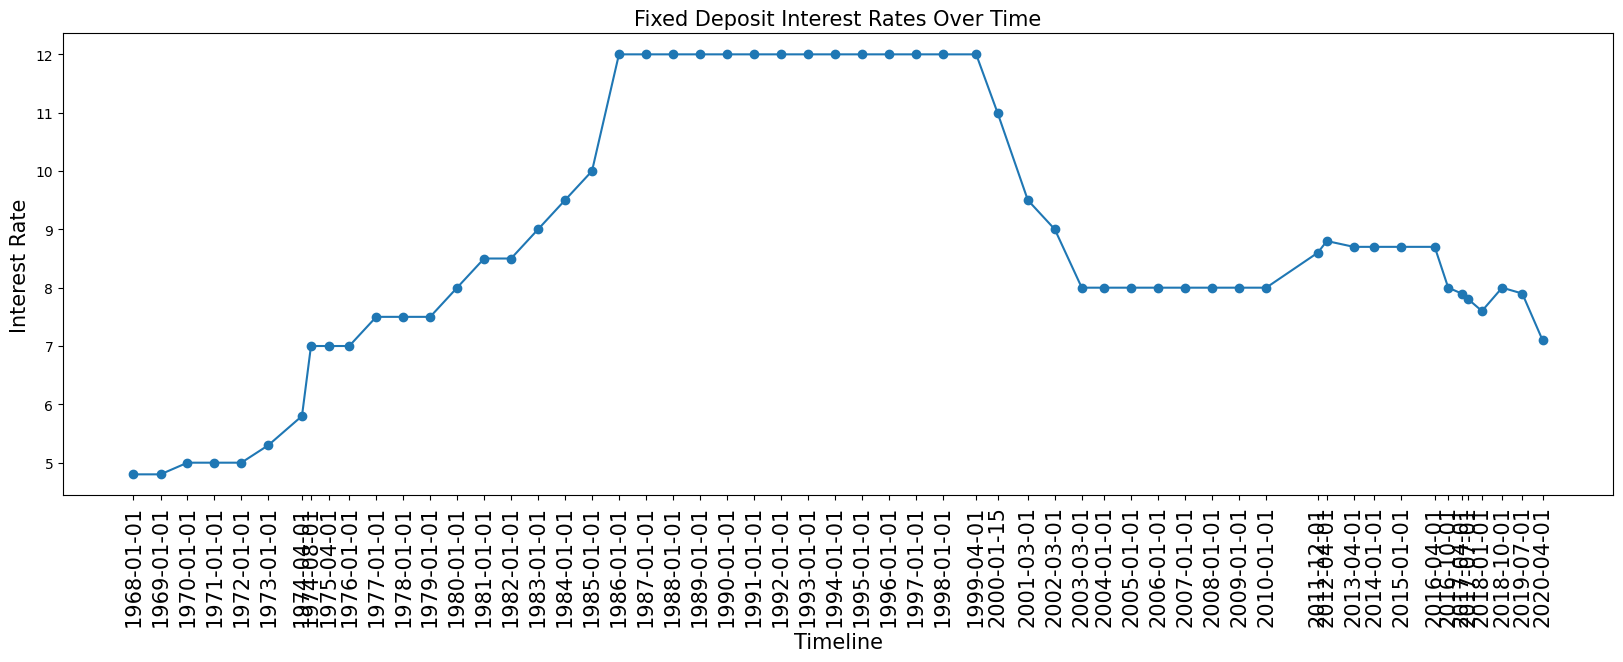

In [8]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['High'], marker='o')
plt.title('Fixed Deposit Interest Rates Over Time',fontsize=15)
plt.xlabel('Timeline',fontsize=15)
plt.ylabel('Interest Rate',fontsize=15)
plt.xticks(df.index,rotation=90,fontsize=15)
plt.show()

c:\Users\Kaiyu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kaiyu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kaiyu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Kaiyu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

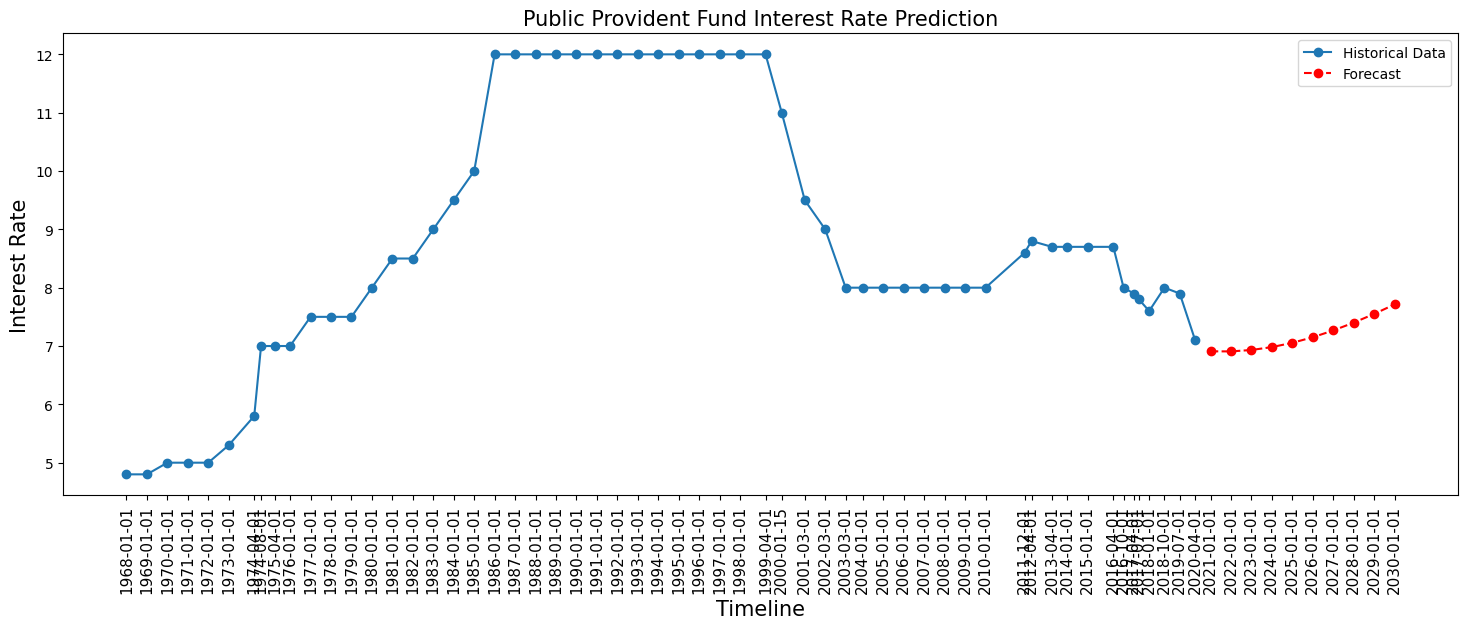

In [12]:
df.index = pd.to_datetime(df.index)
df.index.freq = pd.infer_freq(df.index)
model = ARIMA(df['High'], order=(2, 0, 2))
result = model.fit()

future_steps = 10
forecast_index = pd.date_range(start='2021-01-01', periods=future_steps, freq='YS')

# forecast = result.get_forecast(steps=future_steps)
forecast = result.get_forecast(steps=future_steps, index=forecast_index)

# forecast_index = pd.date_range(start='2021-04-01', periods=future_steps, freq='YE')

plt.figure(figsize=(18, 6))

plt.plot(df.index, df['High'], label='Historical Data', marker='o')
plt.xticks(df.index.union(forecast_index),rotation=90,fontsize=11)
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', marker='o', linestyle='dashed', color='red')
plt.title('Public Provident Fund Interest Rate Prediction',fontsize=15)
plt.xlabel('Timeline',fontsize=15)
plt.ylabel('Interest Rate',fontsize=15)
plt.legend()
plt.show()


In [13]:
forecast.predicted_mean

2021-01-01    6.909262
2022-01-01    6.907452
2023-01-01    6.931839
2024-01-01    6.981409
2025-01-01    7.054817
2026-01-01    7.150421
2027-01-01    7.266313
2028-01-01    7.400345
2029-01-01    7.550175
2030-01-01    7.713297
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [14]:
forecast1=pd.DataFrame(forecast.predicted_mean)
forecast1.reset_index(inplace=True)

In [15]:
forecast1

index  predicted_mean
0 2021-01-01        6.909262
1 2022-01-01        6.907452
2 2023-01-01        6.931839
3 2024-01-01        6.981409
4 2025-01-01        7.054817
5 2026-01-01        7.150421
6 2027-01-01        7.266313
7 2028-01-01        7.400345
8 2029-01-01        7.550175
9 2030-01-01        7.713297

In [17]:
result_df=pd.read_csv('E:/forecast2.csv')
result_df = pd.DataFrame(result_df)

In [18]:
result_df

index  predicted_mean
0  2024-01-01        6.976358
1  2025-01-01        7.065852
2  2026-01-01        7.023395
3  2027-01-01        6.920244
4  2028-01-01        6.789174
5  2029-01-01        6.645262
6  2030-01-01        6.495442
7  2031-01-01        6.342906
8  2032-01-01        6.189120
9  2033-01-01        6.034759

In [19]:
result_df = pd.concat([result_df,forecast1],axis=1,ignore_index=True)

In [22]:
result_df

0         1          2         3
0  2024-01-01  6.976358 2021-01-01  6.909262
1  2025-01-01  7.065852 2022-01-01  6.907452
2  2026-01-01  7.023395 2023-01-01  6.931839
3  2027-01-01  6.920244 2024-01-01  6.981409
4  2028-01-01  6.789174 2025-01-01  7.054817
5  2029-01-01  6.645262 2026-01-01  7.150421
6  2030-01-01  6.495442 2027-01-01  7.266313
7  2031-01-01  6.342906 2028-01-01  7.400345
8  2032-01-01  6.189120 2029-01-01  7.550175
9  2033-01-01  6.034759 2030-01-01  7.713297

In [21]:
result_df.to_csv('forecast2.csv', index=False)

In [36]:
# 2021-12-31    6.909262
# 2022-12-31    6.907452
# 2023-12-31    6.931839
# 2024-12-31    6.981409
# 2025-12-31    7.054817
# 2026-12-31    7.150421
# 2027-12-31    7.266313
# 2028-12-31    7.400345
# 2029-12-31    7.550175
# 2030-12-31    7.713297